In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [2]:
#Load the data 
df = pd.read_csv("cardio_train.csv",delimiter=";")

In [3]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
df.tail()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


In [5]:
df = df.drop(['id'],axis=1)

In [6]:
df.dtypes

age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [7]:
df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


In [9]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
df['age'] = (df['age']/365).round().astype(int)

In [11]:
def age_group(age):
    if age>30 and age<41:
        age_group = '31-40'
    elif age>40 and age<51:
        age_group = '41-50'
    elif age>50 and age<61:
        age_group = '51-60'
    else:
        age_group = '>60'
    return(age_group)

In [12]:
df["Age_group"] = df['age'].apply(age_group)

In [13]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Age_group
0,50,2,168,62.0,110,80,1,1,0,0,1,0,41-50
1,55,1,156,85.0,140,90,3,1,0,0,1,1,51-60
2,52,1,165,64.0,130,70,3,1,0,0,0,1,51-60
3,48,2,169,82.0,150,100,1,1,0,0,1,1,41-50
4,48,1,156,56.0,100,60,1,1,0,0,0,0,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,53,2,168,76.0,120,80,1,1,1,0,1,0,51-60
69996,62,1,158,126.0,140,90,2,2,0,0,1,1,>60
69997,52,2,183,105.0,180,90,3,1,0,1,0,1,51-60
69998,61,1,163,72.0,135,80,1,2,0,0,0,1,>60


In [14]:
df['gender'].value_counts(normalize=True)*100

1    65.042857
2    34.957143
Name: gender, dtype: float64

<AxesSubplot:xlabel='gender', ylabel='count'>

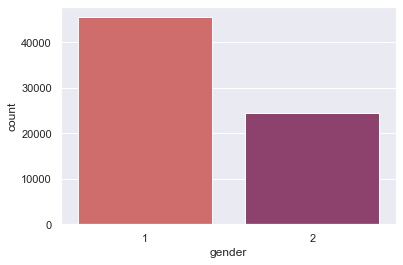

In [15]:
sns.set_theme(style='darkgrid')
sns.countplot(data=df, x='gender',palette='flare')

<AxesSubplot:xlabel='Age_group', ylabel='count'>

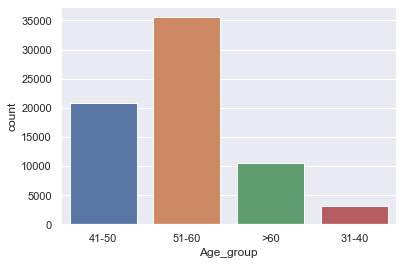

In [16]:
sns.countplot(data=df, x = 'Age_group')

In [17]:
pd.crosstab(df['Age_group'],df['cardio'],margins=True)

cardio,0,1,All
Age_group,,,
31-40,2394,715,3109
41-50,12715,8188,20903
51-60,16677,18872,35549
>60,3235,7204,10439
All,35021,34979,70000


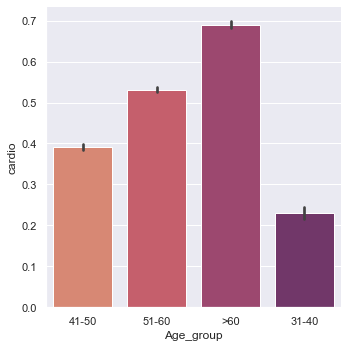

In [18]:
sns.catplot(data=df,x='Age_group',y='cardio',kind='bar',palette='flare')


<AxesSubplot:xlabel='Age_group'>

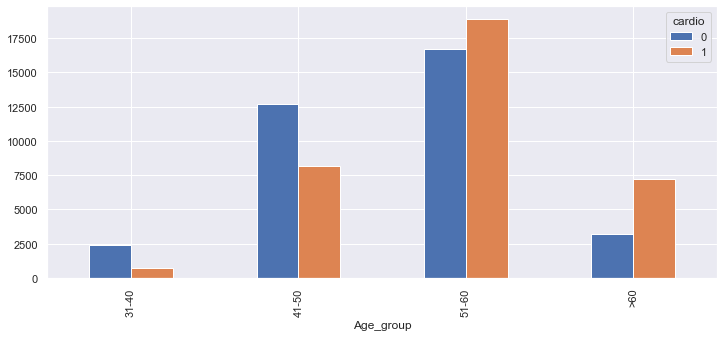

In [19]:
pd.crosstab(df['Age_group'],df['cardio']).plot(kind = 'bar',figsize = (12,5))

<AxesSubplot:>

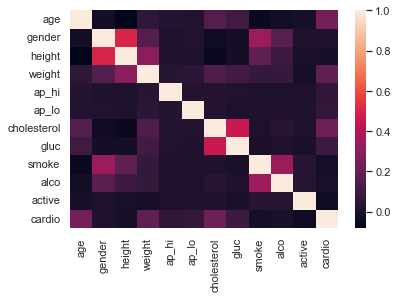

In [20]:
corr = df.corr()
sns.heatmap(corr)

In [21]:
#split into features and target
X = df.drop(['cardio','Age_group'],axis=1)
Y = df['cardio']

In [22]:
#Normalize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [23]:
print(X)

[[-0.49350546  1.36405487  0.44345206 ... -0.31087913 -0.23838436
   0.49416711]
 [ 0.24556599 -0.73310834 -1.01816804 ... -0.31087913 -0.23838436
   0.49416711]
 [-0.19787688 -0.73310834  0.07804703 ... -0.31087913 -0.23838436
  -2.02360695]
 ...
 [-0.19787688  1.36405487  2.27047718 ... -0.31087913  4.19490608
  -2.02360695]
 [ 1.13245175 -0.73310834 -0.16555632 ... -0.31087913 -0.23838436
  -2.02360695]
 [ 0.39338029 -0.73310834  0.68705541 ... -0.31087913 -0.23838436
   0.49416711]]


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=(22))

In [35]:
#train a logistic regression model
Lr = LogisticRegression()
Lr.fit(X_train,Y_train)

LogisticRegression()

In [36]:
#Evaluate on testing dataset
y_pred = Lr.predict(X_test)
accuracy = accuracy_score(Y_test,y_pred)

In [37]:
print(accuracy)

0.7257142857142858


In [38]:
new_data = pd.DataFrame({'age': [50],'gender': [2], 'height': [165], 'weight': [75], 'ap_hi': [120], 'ap_lo': [80],
                         'cholesterol': [2], 'gluc': [1],'smoke': [0],'alco': [0],'active': [0]})

new_data = scaler.transform(new_data)

prediction = Lr.predict(new_data)
print("Prediction:", prediction)

Prediction: [1]


In [ ]:
#train and evaluate 